<a href="https://colab.research.google.com/github/DifferentiableUniverseInitiative/DHOD/blob/master/nb/PoissonVSBinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison of Poisson approximation by Binomial distribution



In [ ]:
!pip install --quiet git+https://github.com/DifferentiableUniverseInitiative/DHOD.git

     |████████████████████████████████| 163 kB 5.0 MB/s 


In [ ]:
#@title Run this to make pretty plots
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = False
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [26]:
%pylab inline
import tensorflow as tf
import tensorflow_probability as tfp
from diffhod.components import Zheng07SatsRelaxedBernoulli, Zheng07Cens, Zheng07SatsPoisson

Populating the interactive namespace from numpy and matplotlib


In [27]:
# Create a small function to know how many sats to expect at a given mass
def get_n_halo(m_halo):
  Ncen = Zheng07Cens(Mhalo=m_halo)
  sats = Zheng07SatsPoisson(Mhalo=m_halo, Ncen=Ncen)
  return sats.distribution.mean()

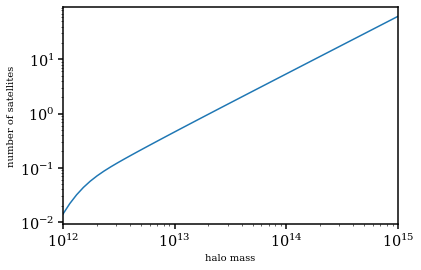

In [28]:
m = np.logspace(12,15).astype('float32')
loglog(m, get_n_halo(m))
xlim(10**12, 10**15)
xlabel('halo mass')
ylabel('number of satellites');

In [29]:
def get_probs(mean=10, n_max=100):
  """ This function creates a Poisson distribution and Binomial distribution
  with same mean. The Binomial depends on total number of counts.
  """
  dist_p = tfp.distributions.Poisson(mean).prob
  dist_b = tfp.distributions.Binomial(total_count=n_max, probs=mean/n_max).prob
  return dist_p, dist_b

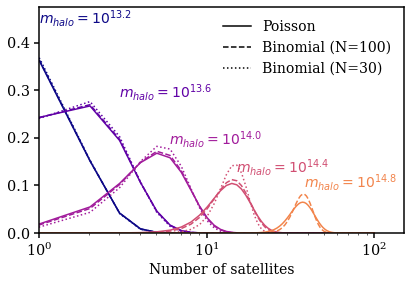

In [65]:
# Number of satellites
x = np.linspace(0,100,100)

masses = np.logspace(13.25, 14.8, 5).astype('float32')
colors = cm.plasma(np.linspace(0,0.7,5))

for i, m in enumerate(masses):
  dist_p, dist_b = get_probs(mean=get_n_halo(m), n_max=100)
  plot(x, dist_p(x), label='$m_{halo} = 10^{%0.1f}$'%np.log10(m), color=colors[i])
  plot(x, dist_b(x), '--', color=colors[i] )
  text(argmax(dist_b(x))+1., max(dist_b(x))+0.015, '$m_{halo} = 10^{%0.1f}$'%np.log10(m), fontsize=14, color=colors[i])
  if log10(m) < 14.5:
    dist_p, dist_b = get_probs(mean=get_n_halo(m), n_max=30)
    plot(x, dist_b(x), ':', color=colors[i])

legend(fontsize=14)

line = Line2D([0], [0], label='manual line', color='k')
line2 = Line2D([0], [0], ls='--', label='manual line', color='k')
line3 = Line2D([0], [0], ls=':', label='manual line', color='k')

legend([line, line2, line3], ['Poisson', 'Binomial (N=100)', 'Binomial (N=30)'], fontsize=14)

xlabel('Number of satellites',fontsize=14);
xlim(1,150);
ylim(0,0.475);
tight_layout()
xscale('log')
plt.savefig("poisson_vs_binomial.pdf", bbox_inches='tight',pad_inches = 0, transparent=True)